In [515]:
import pandas as pd
import pyarrow
import fsspec
import s3fs
import psycopg2
import psycopg2.extras

In [516]:
!pip install boto3 s3fs pyarrow pandas
!hash -r

In [517]:
import boto3

In [518]:
s3 = boto3.resource('s3')
toothbrush_bucket = s3.Bucket('week3-source')

In [519]:
for object in toothbrush_bucket.objects.all():
    print(object.key)

order_data/
order_data/order_data_20220803_0748.csv
order_data/order_data_20220803_0859.csv
order_data_parquet/1
order_data_parquet/2


In [520]:
parquet_1=pd.read_parquet('s3://week3-source/order_data_parquet/1')

In [521]:
parquet_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8473 entries, 0 to 8472
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order Number       8473 non-null   object
 1   Toothbrush Type    8473 non-null   object
 2   Order Date         8473 non-null   object
 3   Customer Age       8473 non-null   int64 
 4   Order Quantity     8473 non-null   int64 
 5   Delivery Postcode  8473 non-null   object
 6   Billing Postcode   8473 non-null   object
 7   is_first           8473 non-null   int64 
 8   Dispatch Status    8473 non-null   object
 9   Dispatched Date    8473 non-null   object
 10  Delivery Status    8443 non-null   object
 11  Delivery Date      8443 non-null   object
dtypes: int64(3), object(9)
memory usage: 794.5+ KB


In [522]:
parquet_2=pd.read_parquet('s3://week3-source/order_data_parquet/2')

In [523]:
parquet_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7722 entries, 0 to 7721
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order Number       7722 non-null   object
 1   Toothbrush Type    7722 non-null   object
 2   Order Date         7722 non-null   object
 3   Customer Age       7722 non-null   int64 
 4   Order Quantity     7722 non-null   int64 
 5   Delivery Postcode  7722 non-null   object
 6   Billing Postcode   7722 non-null   object
 7   is_first           7722 non-null   int64 
 8   Dispatch Status    7722 non-null   object
 9   Dispatched Date    7722 non-null   object
 10  Delivery Status    7679 non-null   object
 11  Delivery Date      7679 non-null   object
dtypes: int64(3), object(9)
memory usage: 724.1+ KB


In [524]:
df = pd.concat([parquet_1,parquet_2])

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16195 entries, 0 to 7721
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order Number       16195 non-null  object
 1   Toothbrush Type    16195 non-null  object
 2   Order Date         16195 non-null  object
 3   Customer Age       16195 non-null  int64 
 4   Order Quantity     16195 non-null  int64 
 5   Delivery Postcode  16195 non-null  object
 6   Billing Postcode   16195 non-null  object
 7   is_first           16195 non-null  int64 
 8   Dispatch Status    16195 non-null  object
 9   Dispatched Date    16195 non-null  object
 10  Delivery Status    16122 non-null  object
 11  Delivery Date      16122 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.6+ MB


In [526]:
df['Dispatched Date']=pd.to_datetime(df['Dispatched Date'],errors='coerce')
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['Delivery Date']=pd.to_datetime(df['Delivery Date'],errors='coerce')

## Compute the 'order to dispatch' time

In [527]:
df['Dispatch Status'].unique()

array(['Dispatched', 'Order Received', 'Order Confirmed'], dtype=object)

In [528]:
DF_only_dispatched = df[(df["Dispatch Status"] == "Dispatched")]

In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16195 entries, 0 to 7721
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order Number       16195 non-null  object        
 1   Toothbrush Type    16195 non-null  object        
 2   Order Date         16195 non-null  datetime64[ns]
 3   Customer Age       16195 non-null  int64         
 4   Order Quantity     16195 non-null  int64         
 5   Delivery Postcode  16195 non-null  object        
 6   Billing Postcode   16195 non-null  object        
 7   is_first           16195 non-null  int64         
 8   Dispatch Status    16195 non-null  object        
 9   Dispatched Date    16195 non-null  datetime64[ns]
 10  Delivery Status    16122 non-null  object        
 11  Delivery Date      16122 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(3), object(6)
memory usage: 1.6+ MB


In [530]:
df.head(10)

,Order Number,Toothbrush Type,Order Date,Customer Age,Order Quantity,Delivery Postcode,Billing Postcode,is_first,Dispatch Status,Dispatched Date,Delivery Status,Delivery Date
0,BRU00006087,Toothbrush 4000,2022-02-08 18:01:45.572166400,30,1,CW2%206JT,CV34 5LQ,1,Dispatched,2022-02-09 00:03:56.646510399,Delivered,2022-02-10 02:24:36.208709199
1,BRU00004946,Toothbrush 4000,2022-02-04 12:05:37.447536800,18,8,CB3%200RD,DN14 5DH,1,Dispatched,2022-02-04 18:55:46.655676800,Delivered,2022-02-06 04:53:57.263182400
2,BRU00000723,Toothbrush 4000,2021-08-07 13:37:38.234413600,23,5,NG32%203AY,S71 2GD,1,Dispatched,2021-08-07 21:02:42.457034800,Delivered,2021-08-09 06:25:02.592044800
3,BRU00000942,Toothbrush 4000,2022-02-11 20:03:45.066561200,26,9,CR0%207AU,LN11 0XS,1,Dispatched,2022-02-12 03:48:35.565236000,Delivered,2022-02-13 06:34:01.375112000
4,BRU00003658,Toothbrush 2000,2021-09-26 04:56:02.086210800,76,9,G33%204JU,NN7 4EH,1,Dispatched,2021-09-26 11:58:58.045588800,Delivered,2021-09-27 18:38:51.340798800
5,BRU00005693,Toothbrush 4000,2022-07-08 12:39:22.149913200,38,8,PH16%205NA,NG33 4EA,1,Dispatched,2022-07-08 19:53:21.739587600,Delivered,2022-07-09 20:00:03.355443600
6,BRU00001990,Toothbrush 2000,2021-08-20 12:39:34.745370400,88,3,BN27%209DX,PE27 3HJ,1,Dispatched,2021-08-20 19:13:52.411486000,Delivered,2021-08-22 04:21:48.194304400
7,BRU00007296,Toothbrush 4000,2021-05-19 01:36:21.216788800,27,3,BN14%207TH,DH2 1BL,1,Dispatched,2021-05-19 08:09:36.887506000,Delivered,2021-05-20 03:06:25.402750000
8,BRU00007692,Toothbrush 4000,2021-01-06 18:58:02.874072000,29,5,SA8%203DN,DL15 9SE,1,Dispatched,2021-01-07 02:20:46.872294000,Delivered,2021-01-08 06:22:46.876458000
9,BRU00006415,Toothbrush 2000,2021-08-29 00:54:25.635452000,64,1,IV12%204EW,EX1 3SX,1,Dispatched,2021-08-29 07:55:37.482549200,Delivered,2021-08-30 05:59:04.688159600


In [531]:
df['Delivery Status'].unique()

array(['Delivered', None, 'In Transit', 'Unsuccessful'], dtype=object)

In [532]:
DF_only_dispatched['dispatch_difference'] = DF_only_dispatched["Dispatched Date"] - DF_only_dispatched["Order Date"]

/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/487213602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_only_dispatched['dispatch_difference'] = DF_only_dispatched["Dispatched Date"] - DF_only_dispatched["Order Date"]


In [533]:
DF_only_dispatched['dispatch_difference']

0      0 days 06:02:11.074343999
1         0 days 06:50:09.208140
2      0 days 07:25:04.222621200
3      0 days 07:44:50.498674800
4         0 days 07:02:55.959378
                  ...           
7717   0 days 07:21:59.579294400
7718   0 days 06:53:30.088017600
7719   0 days 07:00:27.642520800
7720   0 days 06:59:40.904440800
7721   0 days 06:56:16.751954400
Name: dispatch_difference, Length: 16122, dtype: timedelta64[ns]

In [534]:
DF_only_dispatched['dispatch_difference_hours'] = (
    DF_only_dispatched["Dispatched Date"] - 
    DF_only_dispatched["Order Date"]
).dt.total_seconds() / 60 / 60

DF_only_dispatched['dispatch_difference_hours']

/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/1698832667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_only_dispatched['dispatch_difference_hours'] = (


0       6.036410
1       6.835891
2       7.417840
3       7.747361
4       7.048878
          ...   
7717    7.366550
7718    6.891691
7719    7.007678
7720    6.994696
7721    6.937987
Name: dispatch_difference_hours, Length: 16122, dtype: float64

In [535]:
DF_only_dispatched['dispatch_difference_hours'].mean()

7.103417400169012

In [536]:
DF_only_dispatched['dispatch_difference_hours'].value_counts(bins=8)

(6.801, 7.411]    6920
(7.411, 8.02]     3878
(6.192, 6.801]    3875
(5.583, 6.192]     715
(8.02, 8.629]      655
(8.629, 9.239]      42
(4.968, 5.583]      36
(9.239, 9.848]       1
Name: dispatch_difference_hours, dtype: int64

In [537]:
DF_only_dispatched['Customer Age'].value_counts(bins=8)

(18.25, 34.375]                 4996
(66.625, 82.75]                 4301
(82.75, 98.875]                 1796
(50.5, 66.625]                  1735
(2.125, 18.25]                  1724
(34.375, 50.5]                  1412
(98.875, 115.0]                  100
(-14.129999999999999, 2.125]      58
Name: Customer Age, dtype: int64

_Normalising the customer ages, setting any negative customer age to the median customer age;_

In [538]:
df.loc[df["Customer Age"] < 0, "Customer Age"] = df["Customer Age"].median()

In [539]:
df_2000=df[df['Toothbrush Type']=='Toothbrush 2000']

_Binning ages and ranking age categories by no. of customers for the Toothbrush 2000 range:_

In [540]:
df_2000_age_segments=df_2000['Customer Age'].value_counts(bins=[1,18,35,50,65,150]).sort_values(ascending=False)


**The age segment with most customers for the Toothbrush 2000 range is 65+**

In [541]:
df_2000_buy_times=df_2000['Order Date'].dt.hour.value_counts(bins=23)
df_2000_buy_times.sort_values()

(3.0, 4.0]       306
(4.0, 5.0]       307
(2.0, 3.0]       308
(21.0, 22.0]     311
(20.0, 21.0]     317
(19.0, 20.0]     323
(9.0, 10.0]      323
(1.0, 2.0]       327
(17.0, 18.0]     331
(18.0, 19.0]     334
(7.0, 8.0]       336
(10.0, 11.0]     337
(15.0, 16.0]     339
(22.0, 23.0]     339
(5.0, 6.0]       344
(16.0, 17.0]     345
(6.0, 7.0]       354
(14.0, 15.0]     355
(12.0, 13.0]     355
(8.0, 9.0]       359
(13.0, 14.0]     364
(11.0, 12.0]     372
(-0.024, 1.0]    669
Name: Order Date, dtype: int64

**The most orders for the toothbrush 2000 range are placed between 00:00 and 01:00**

_Binning ages and ranking age categories by no. of customers for the Toothbrush 2000 range:_

In [542]:
df_4000=df[df['Toothbrush Type']=='Toothbrush 4000']

In [543]:
df_4000_age_segments=df_4000['Customer Age'].value_counts(bins=[1,18,35,50,65,150]).sort_values(ascending=False)
df_4000_age_segments

(18.0, 35.0]     5233
(0.999, 18.0]    1757
(35.0, 50.0]     1104
(50.0, 65.0]       30
(65.0, 150.0]       0
Name: Customer Age, dtype: int64

**The age segment with most customers for the Toothbrush 4000 range is 18-35**

In [544]:
df_4000_buy_times=df_4000['Order Date'].dt.hour.value_counts(bins=23)
df_4000_buy_times

(-0.024, 1.0]    646
(6.0, 7.0]       388
(7.0, 8.0]       365
(21.0, 22.0]     360
(9.0, 10.0]      359
(19.0, 20.0]     355
(16.0, 17.0]     355
(8.0, 9.0]       352
(12.0, 13.0]     348
(11.0, 12.0]     347
(15.0, 16.0]     345
(18.0, 19.0]     345
(22.0, 23.0]     345
(1.0, 2.0]       339
(17.0, 18.0]     334
(10.0, 11.0]     333
(20.0, 21.0]     330
(5.0, 6.0]       329
(14.0, 15.0]     328
(3.0, 4.0]       325
(2.0, 3.0]       310
(4.0, 5.0]       306
(13.0, 14.0]     296
Name: Order Date, dtype: int64

**The most orders for the toothbrush 4000 range are placed between 00:00 and 01:00**

_When are unsuccessful deliveries occurring?_

In [545]:
df_delivery_unsuccessful=df[df['Delivery Status']=='Unsuccessful']

In [546]:
df_fail_times=df_delivery_unsuccessful['Delivery Date'].dt.hour.value_counts(bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
df_fail_times

(-0.001, 1.0]    1
(7.0, 8.0]       1
(20.0, 21.0]     1
(19.0, 20.0]     1
(8.0, 9.0]       1
(22.0, 23.0]     1
(6.0, 7.0]       0
(15.0, 16.0]     0
(21.0, 22.0]     0
(2.0, 3.0]       0
(3.0, 4.0]       0
(18.0, 19.0]     0
(17.0, 18.0]     0
(16.0, 17.0]     0
(14.0, 15.0]     0
(5.0, 6.0]       0
(13.0, 14.0]     0
(12.0, 13.0]     0
(1.0, 2.0]       0
(10.0, 11.0]     0
(9.0, 10.0]      0
(4.0, 5.0]       0
(11.0, 12.0]     0
Name: Delivery Date, dtype: int64

## Challenge 3

_Renaming columns_

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16195 entries, 0 to 7721
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order Number       16195 non-null  object        
 1   Toothbrush Type    16195 non-null  object        
 2   Order Date         16195 non-null  datetime64[ns]
 3   Customer Age       16195 non-null  int64         
 4   Order Quantity     16195 non-null  int64         
 5   Delivery Postcode  16195 non-null  object        
 6   Billing Postcode   16195 non-null  object        
 7   is_first           16195 non-null  int64         
 8   Dispatch Status    16195 non-null  object        
 9   Dispatched Date    16195 non-null  datetime64[ns]
 10  Delivery Status    16122 non-null  object        
 11  Delivery Date      16122 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(3), object(6)
memory usage: 1.6+ MB


In [548]:
df=df.rename(columns={'Order Number':'order_number','Toothbrush Type':'toothbrush_type','Order Date':'order_date',
'Customer Age':'customer_age','Order Quantity':'order_quantity','Delivery Postcode':'delivery postcode','Billing Postcode':'billing_postcode',
'Dispatch Status':'dispatch_status','Dispatched Date':'dispatched_date','Delivery Status':'delivery_status','Delivery Date':'delivery_date'})

In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16195 entries, 0 to 7721
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       16195 non-null  object        
 1   toothbrush_type    16195 non-null  object        
 2   order_date         16195 non-null  datetime64[ns]
 3   customer_age       16195 non-null  int64         
 4   order_quantity     16195 non-null  int64         
 5   delivery postcode  16195 non-null  object        
 6   billing_postcode   16195 non-null  object        
 7   is_first           16195 non-null  int64         
 8   dispatch_status    16195 non-null  object        
 9   dispatched_date    16195 non-null  datetime64[ns]
 10  delivery_status    16122 non-null  object        
 11  delivery_date      16122 non-null  datetime64[ns]
dtypes: datetime64[ns](3), int64(3), object(6)
memory usage: 1.6+ MB


## Visualise dispatch to delivery time

_Removing any orders that haven't been dispatched yet, since we obviously can't find their dispatch time_

In [550]:
DF_only_dispatched = df[(df["dispatch_status"] == "Dispatched")]
DF_only_dispatched

,order_number,toothbrush_type,order_date,customer_age,order_quantity,delivery postcode,billing_postcode,is_first,dispatch_status,dispatched_date,delivery_status,delivery_date
0,BRU00006087,Toothbrush 4000,2022-02-08 18:01:45.572166400,30,1,CW2%206JT,CV34 5LQ,1,Dispatched,2022-02-09 00:03:56.646510399,Delivered,2022-02-10 02:24:36.208709199
1,BRU00004946,Toothbrush 4000,2022-02-04 12:05:37.447536800,18,8,CB3%200RD,DN14 5DH,1,Dispatched,2022-02-04 18:55:46.655676800,Delivered,2022-02-06 04:53:57.263182400
2,BRU00000723,Toothbrush 4000,2021-08-07 13:37:38.234413600,23,5,NG32%203AY,S71 2GD,1,Dispatched,2021-08-07 21:02:42.457034800,Delivered,2021-08-09 06:25:02.592044800
3,BRU00000942,Toothbrush 4000,2022-02-11 20:03:45.066561200,26,9,CR0%207AU,LN11 0XS,1,Dispatched,2022-02-12 03:48:35.565236000,Delivered,2022-02-13 06:34:01.375112000
4,BRU00003658,Toothbrush 2000,2021-09-26 04:56:02.086210800,76,9,G33%204JU,NN7 4EH,1,Dispatched,2021-09-26 11:58:58.045588800,Delivered,2021-09-27 18:38:51.340798800
...,...,...,...,...,...,...,...,...,...,...,...,...
7717,BRU00006368,Toothbrush 4000,2022-05-14 14:45:37.888868400,36,7,HP12 4TT,HP12 4TT,1,Dispatched,2022-05-14 22:07:37.468162800,Delivered,2022-05-16 01:18:56.336614800
7718,BRU00002703,Toothbrush 2000,2021-01-13 13:39:21.524274000,65,5,BB1 2EP,BB1 2EP,1,Dispatched,2021-01-13 20:32:51.612291600,Delivered,2021-01-14 21:30:09.167662800
7719,BRU00006252,Toothbrush 2000,2021-04-12 08:22:26.808347600,83,2,NE5 2NS,NE5 2NS,1,Dispatched,2021-04-12 15:22:54.450868400,Delivered,2021-04-13 21:09:53.703071600
7720,BRU00005921,Toothbrush 2000,2021-11-21 15:17:38.245222400,78,8,NW6 4AS,NW6 4AS,1,Dispatched,2021-11-21 22:17:19.149663200,Delivered,2021-11-23 02:24:37.566537200


_Calculating a dispatch time in hours:_

In [551]:
for col in ['order_date', 'delivery_date', 'dispatched_date']:
    DF_only_dispatched[col] = pd.to_datetime(DF_only_dispatched[col], errors='coerce')

DF_only_dispatched['difference_hours']= (DF_only_dispatched["dispatched_date"] - DF_only_dispatched["order_date"]).dt.total_seconds() / 60 / 60

DF_only_dispatched

/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/2556711468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_only_dispatched[col] = pd.to_datetime(DF_only_dispatched[col], errors='coerce')
/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/2556711468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_only_dispatched[col] = pd.to_datetime(DF_only_dispatched[col], errors='coerce')
/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/2556711468.py:2: SettingW

,order_number,toothbrush_type,order_date,customer_age,order_quantity,delivery postcode,billing_postcode,is_first,dispatch_status,dispatched_date,delivery_status,delivery_date,difference_hours
0,BRU00006087,Toothbrush 4000,2022-02-08 18:01:45.572166400,30,1,CW2%206JT,CV34 5LQ,1,Dispatched,2022-02-09 00:03:56.646510399,Delivered,2022-02-10 02:24:36.208709199,6.036410
1,BRU00004946,Toothbrush 4000,2022-02-04 12:05:37.447536800,18,8,CB3%200RD,DN14 5DH,1,Dispatched,2022-02-04 18:55:46.655676800,Delivered,2022-02-06 04:53:57.263182400,6.835891
2,BRU00000723,Toothbrush 4000,2021-08-07 13:37:38.234413600,23,5,NG32%203AY,S71 2GD,1,Dispatched,2021-08-07 21:02:42.457034800,Delivered,2021-08-09 06:25:02.592044800,7.417840
3,BRU00000942,Toothbrush 4000,2022-02-11 20:03:45.066561200,26,9,CR0%207AU,LN11 0XS,1,Dispatched,2022-02-12 03:48:35.565236000,Delivered,2022-02-13 06:34:01.375112000,7.747361
4,BRU00003658,Toothbrush 2000,2021-09-26 04:56:02.086210800,76,9,G33%204JU,NN7 4EH,1,Dispatched,2021-09-26 11:58:58.045588800,Delivered,2021-09-27 18:38:51.340798800,7.048878
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7717,BRU00006368,Toothbrush 4000,2022-05-14 14:45:37.888868400,36,7,HP12 4TT,HP12 4TT,1,Dispatched,2022-05-14 22:07:37.468162800,Delivered,2022-05-16 01:18:56.336614800,7.366550
7718,BRU00002703,Toothbrush 2000,2021-01-13 13:39:21.524274000,65,5,BB1 2EP,BB1 2EP,1,Dispatched,2021-01-13 20:32:51.612291600,Delivered,2021-01-14 21:30:09.167662800,6.891691
7719,BRU00006252,Toothbrush 2000,2021-04-12 08:22:26.808347600,83,2,NE5 2NS,NE5 2NS,1,Dispatched,2021-04-12 15:22:54.450868400,Delivered,2021-04-13 21:09:53.703071600,7.007678
7720,BRU00005921,Toothbrush 2000,2021-11-21 15:17:38.245222400,78,8,NW6 4AS,NW6 4AS,1,Dispatched,2021-11-21 22:17:19.149663200,Delivered,2021-11-23 02:24:37.566537200,6.994696


_Making hours into integers to make them easier to work with:_

In [552]:
DF_only_dispatched['difference_hours'] = DF_only_dispatched['difference_hours'].astype('int64')

/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/2203406561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_only_dispatched['difference_hours'] = DF_only_dispatched['difference_hours'].astype('int64')


In [553]:
DF_only_dispatched.groupby('difference_hours').sum()

/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/130224239.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DF_only_dispatched.groupby('difference_hours').sum()


,customer_age,order_quantity,is_first
difference_hours,,,
4,16,5,1
5,17089,1691,334
6,322917,31794,6449
7,427229,42932,8583
8,38091,3828,750
9,177,18,5


/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/2853513788.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DF_only_dispatched.groupby('difference_hours').sum().plot(


<AxesSubplot: title={'center': 'Time taken to dispatch hours'}, xlabel='Time to dispatch (hours)', ylabel='No. of orders'>

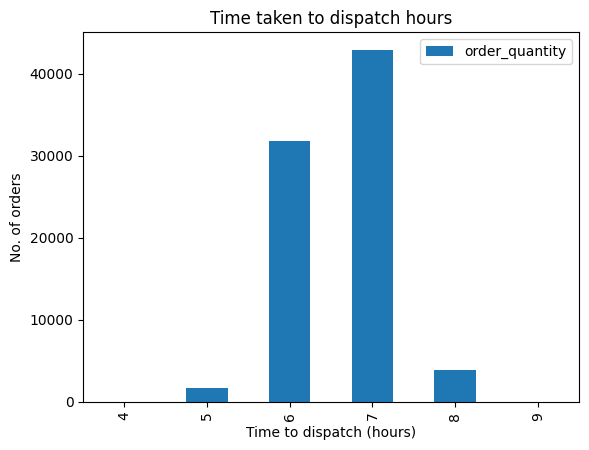

In [554]:
DF_only_dispatched.groupby('difference_hours').sum().plot(
    kind='bar',y='order_quantity',xlabel='Time to dispatch (hours)',ylabel='No. of orders',title='Time taken to dispatch hours')

In [555]:
df['order_time']=df['order_date'].dt.hour

In [556]:
time_windows = ['Before 6am', '6am-midday', 'Midday-6pm', 'After 6pm']
time_bins = [0,6,12,18,24]
df['time_windows'] = pd.cut(df['order_time'], labels=time_windows, bins=time_bins)

In [557]:
age_labels = ['Under 18', '18-34', '35-49', '50-64','65+']
age_bins = [0,17, 34, 49, 64,150]
df['age_bracket'] = pd.cut(df['customer_age'], labels=age_labels, bins=age_bins)

In [558]:
df.head(10)

,order_number,toothbrush_type,order_date,customer_age,order_quantity,delivery postcode,billing_postcode,is_first,dispatch_status,dispatched_date,delivery_status,delivery_date,order_time,time_windows,age_bracket
0,BRU00006087,Toothbrush 4000,2022-02-08 18:01:45.572166400,30,1,CW2%206JT,CV34 5LQ,1,Dispatched,2022-02-09 00:03:56.646510399,Delivered,2022-02-10 02:24:36.208709199,18,Midday-6pm,18-34
1,BRU00004946,Toothbrush 4000,2022-02-04 12:05:37.447536800,18,8,CB3%200RD,DN14 5DH,1,Dispatched,2022-02-04 18:55:46.655676800,Delivered,2022-02-06 04:53:57.263182400,12,6am-midday,18-34
2,BRU00000723,Toothbrush 4000,2021-08-07 13:37:38.234413600,23,5,NG32%203AY,S71 2GD,1,Dispatched,2021-08-07 21:02:42.457034800,Delivered,2021-08-09 06:25:02.592044800,13,Midday-6pm,18-34
3,BRU00000942,Toothbrush 4000,2022-02-11 20:03:45.066561200,26,9,CR0%207AU,LN11 0XS,1,Dispatched,2022-02-12 03:48:35.565236000,Delivered,2022-02-13 06:34:01.375112000,20,After 6pm,18-34
4,BRU00003658,Toothbrush 2000,2021-09-26 04:56:02.086210800,76,9,G33%204JU,NN7 4EH,1,Dispatched,2021-09-26 11:58:58.045588800,Delivered,2021-09-27 18:38:51.340798800,4,Before 6am,65+
5,BRU00005693,Toothbrush 4000,2022-07-08 12:39:22.149913200,38,8,PH16%205NA,NG33 4EA,1,Dispatched,2022-07-08 19:53:21.739587600,Delivered,2022-07-09 20:00:03.355443600,12,6am-midday,35-49
6,BRU00001990,Toothbrush 2000,2021-08-20 12:39:34.745370400,88,3,BN27%209DX,PE27 3HJ,1,Dispatched,2021-08-20 19:13:52.411486000,Delivered,2021-08-22 04:21:48.194304400,12,6am-midday,65+
7,BRU00007296,Toothbrush 4000,2021-05-19 01:36:21.216788800,27,3,BN14%207TH,DH2 1BL,1,Dispatched,2021-05-19 08:09:36.887506000,Delivered,2021-05-20 03:06:25.402750000,1,Before 6am,18-34
8,BRU00007692,Toothbrush 4000,2021-01-06 18:58:02.874072000,29,5,SA8%203DN,DL15 9SE,1,Dispatched,2021-01-07 02:20:46.872294000,Delivered,2021-01-08 06:22:46.876458000,18,Midday-6pm,18-34
9,BRU00006415,Toothbrush 2000,2021-08-29 00:54:25.635452000,64,1,IV12%204EW,EX1 3SX,1,Dispatched,2021-08-29 07:55:37.482549200,Delivered,2021-08-30 05:59:04.688159600,0,NaN,50-64


In [559]:
df_2000=df[df['toothbrush_type']=='Toothbrush 2000']

/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/377610600.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2000.groupby('age_bracket').sum().plot(


<AxesSubplot: title={'center': 'Age breakdown for Toothbrush 2000 customers'}, xlabel='Age bracket', ylabel='Order quantity'>

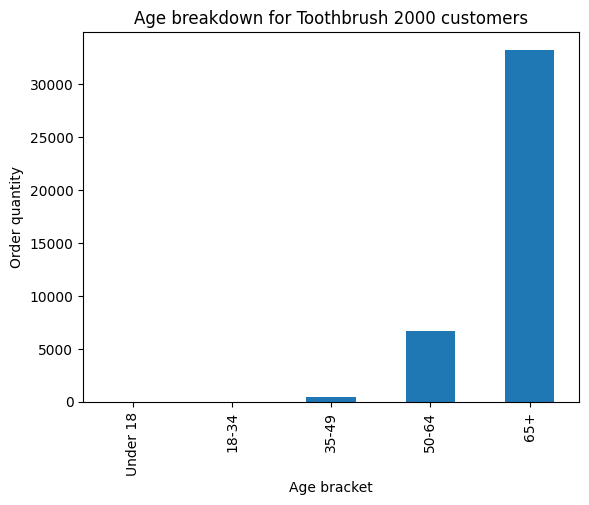

In [560]:
df_2000.groupby('age_bracket').sum().plot(
    kind='bar',y='order_quantity',xlabel='Age bracket',ylabel='Order quantity',legend=False,title='Age breakdown for Toothbrush 2000 customers'
)

/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/2356007853.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2000.groupby('age_bracket').sum().plot(


<AxesSubplot: title={'center': 'Age breakdown for Toothbrush 2000 customers'}, xlabel='Age bracket', ylabel='Order quantity'>

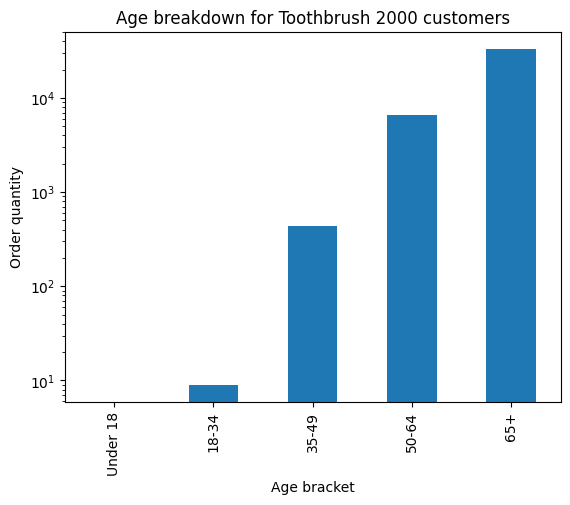

In [561]:
df_2000.groupby('age_bracket').sum().plot(
    kind='bar',y='order_quantity',xlabel='Age bracket',ylabel='Order quantity',legend=False,title='Age breakdown for Toothbrush 2000 customers',logy=True
)

/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/1108902968.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_4000.groupby('age_bracket').sum().plot(


<AxesSubplot: title={'center': 'Age breakdown for Toothbrush 4000 customers'}, xlabel='Age bracket', ylabel='Order quantity'>

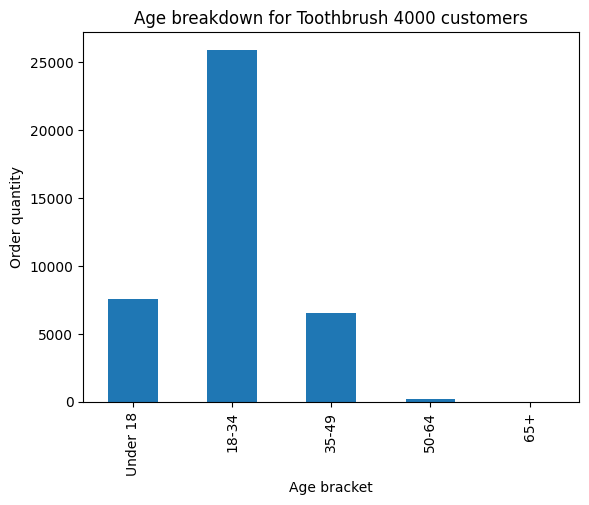

In [562]:
df_4000=df[df['toothbrush_type']=='Toothbrush 4000']
df_4000.groupby('age_bracket').sum().plot(
    kind='bar',y='order_quantity',xlabel='Age bracket',ylabel='Order quantity',legend=False,title='Age breakdown for Toothbrush 4000 customers'
)

/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/279633986.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_4000.groupby('age_bracket').sum().plot(


<AxesSubplot: title={'center': 'Age breakdown for Toothbrush 4000 customers'}, xlabel='Age bracket', ylabel='Order quantity'>

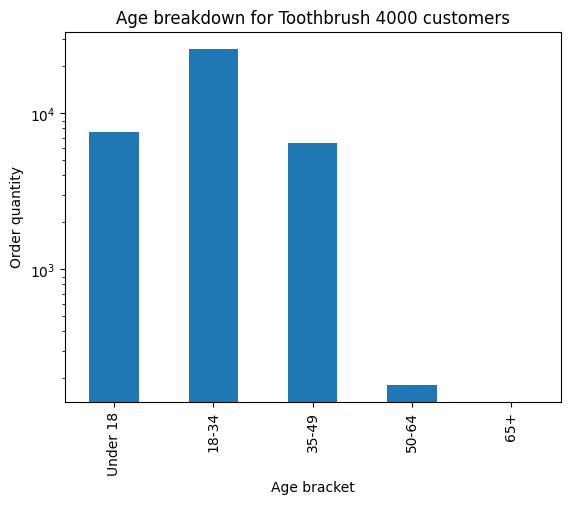

In [563]:
df_4000=df[df['toothbrush_type']=='Toothbrush 4000']
df_4000.groupby('age_bracket').sum().plot(
    kind='bar',y='order_quantity',xlabel='Age bracket',ylabel='Order quantity',legend=False,title='Age breakdown for Toothbrush 4000 customers',logy=True
)

/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/3603482494.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2000.groupby(['order_time']).sum().plot(


<AxesSubplot: title={'center': 'Orders of Toothbrush 2000 by time of day placed'}, xlabel='Time of day (nearest hour, 24h clock)', ylabel='Order quantity'>

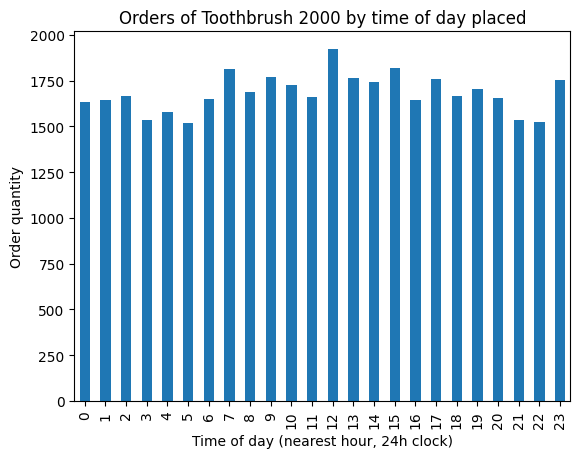

In [564]:
df_2000.groupby(['order_time']).sum().plot(
    y='order_quantity',kind='bar',ylabel='Order quantity',xlabel='Time of day (nearest hour, 24h clock)',title='Orders of Toothbrush 2000 by time of day placed',
    legend=False)

In [565]:
time_windows = ['Before 6am', '6am-midday', 'Midday-6pm', 'After 6pm']
time_bins = [0,6,12,18,24]
df['time_windows'] = pd.cut(df['order_time'], labels=time_windows, bins=time_bins)

In [566]:
df.head(10)

,order_number,toothbrush_type,order_date,customer_age,order_quantity,delivery postcode,billing_postcode,is_first,dispatch_status,dispatched_date,delivery_status,delivery_date,order_time,time_windows,age_bracket
0,BRU00006087,Toothbrush 4000,2022-02-08 18:01:45.572166400,30,1,CW2%206JT,CV34 5LQ,1,Dispatched,2022-02-09 00:03:56.646510399,Delivered,2022-02-10 02:24:36.208709199,18,Midday-6pm,18-34
1,BRU00004946,Toothbrush 4000,2022-02-04 12:05:37.447536800,18,8,CB3%200RD,DN14 5DH,1,Dispatched,2022-02-04 18:55:46.655676800,Delivered,2022-02-06 04:53:57.263182400,12,6am-midday,18-34
2,BRU00000723,Toothbrush 4000,2021-08-07 13:37:38.234413600,23,5,NG32%203AY,S71 2GD,1,Dispatched,2021-08-07 21:02:42.457034800,Delivered,2021-08-09 06:25:02.592044800,13,Midday-6pm,18-34
3,BRU00000942,Toothbrush 4000,2022-02-11 20:03:45.066561200,26,9,CR0%207AU,LN11 0XS,1,Dispatched,2022-02-12 03:48:35.565236000,Delivered,2022-02-13 06:34:01.375112000,20,After 6pm,18-34
4,BRU00003658,Toothbrush 2000,2021-09-26 04:56:02.086210800,76,9,G33%204JU,NN7 4EH,1,Dispatched,2021-09-26 11:58:58.045588800,Delivered,2021-09-27 18:38:51.340798800,4,Before 6am,65+
5,BRU00005693,Toothbrush 4000,2022-07-08 12:39:22.149913200,38,8,PH16%205NA,NG33 4EA,1,Dispatched,2022-07-08 19:53:21.739587600,Delivered,2022-07-09 20:00:03.355443600,12,6am-midday,35-49
6,BRU00001990,Toothbrush 2000,2021-08-20 12:39:34.745370400,88,3,BN27%209DX,PE27 3HJ,1,Dispatched,2021-08-20 19:13:52.411486000,Delivered,2021-08-22 04:21:48.194304400,12,6am-midday,65+
7,BRU00007296,Toothbrush 4000,2021-05-19 01:36:21.216788800,27,3,BN14%207TH,DH2 1BL,1,Dispatched,2021-05-19 08:09:36.887506000,Delivered,2021-05-20 03:06:25.402750000,1,Before 6am,18-34
8,BRU00007692,Toothbrush 4000,2021-01-06 18:58:02.874072000,29,5,SA8%203DN,DL15 9SE,1,Dispatched,2021-01-07 02:20:46.872294000,Delivered,2021-01-08 06:22:46.876458000,18,Midday-6pm,18-34
9,BRU00006415,Toothbrush 2000,2021-08-29 00:54:25.635452000,64,1,IV12%204EW,EX1 3SX,1,Dispatched,2021-08-29 07:55:37.482549200,Delivered,2021-08-30 05:59:04.688159600,0,NaN,50-64


/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/2550571721.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2000.groupby(['time_windows']).sum().plot(


<AxesSubplot: title={'center': 'Orders of Toothbrush 2000 by time of day placed'}, ylabel='Order quantity'>

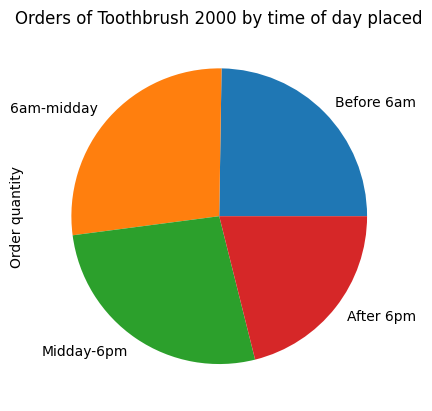

In [570]:
df_2000.groupby(['time_windows']).sum().plot(
    y='order_quantity',kind='pie',ylabel='Order quantity',xlabel='Time of day (nearest hour, 24h clock)',title='Orders of Toothbrush 2000 by time of day placed',
    legend=False)

/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/4185959578.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_4000.groupby(['order_time']).sum().plot(


<AxesSubplot: title={'center': 'Orders of Toothbrush 4000 by time of day placed'}, xlabel='Time of day (nearest hour, 24h clock)', ylabel='Order quantity'>

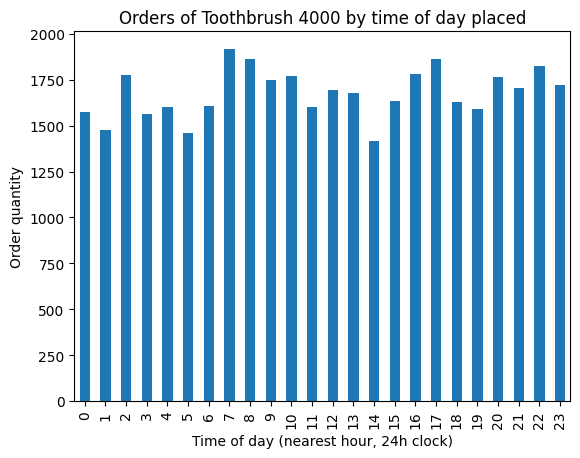

In [571]:
df_4000.groupby(['order_time']).sum().plot(
    y='order_quantity',kind='bar',ylabel='Order quantity',xlabel='Time of day (nearest hour, 24h clock)',title='Orders of Toothbrush 4000 by time of day placed',
    legend=False)

/var/folders/n3/ffwxys9n7_g_dzzr0q172hp40000gn/T/ipykernel_36797/397645160.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_4000.groupby(['time_windows']).sum().plot(


<AxesSubplot: title={'center': 'Orders of Toothbrush 4000 by time of day placed'}, ylabel='Order quantity'>

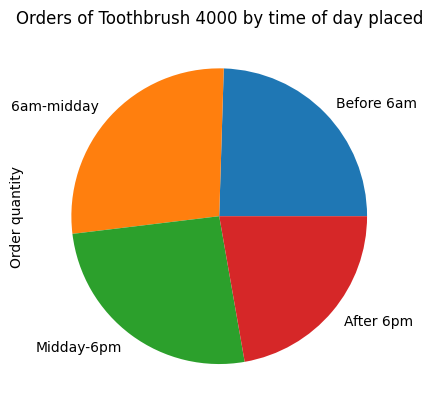

In [569]:
df_4000.groupby(['time_windows']).sum().plot(
    y='order_quantity',kind='pie',ylabel='Order quantity',xlabel='Time of day (nearest hour, 24h clock)',title='Orders of Toothbrush 4000 by time of day placed',
    legend=False)